In [6]:
!python --version


Python 3.11.7


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import pickle

import warnings
warnings.filterwarnings('ignore')


In [2]:
file_path=r"dataset/Housing.csv"
df=pd.read_csv(file_path)
(df.head())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [4]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
# Check for outliers and visualize distributions
numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [6]:
# Summary statistics
print(df.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


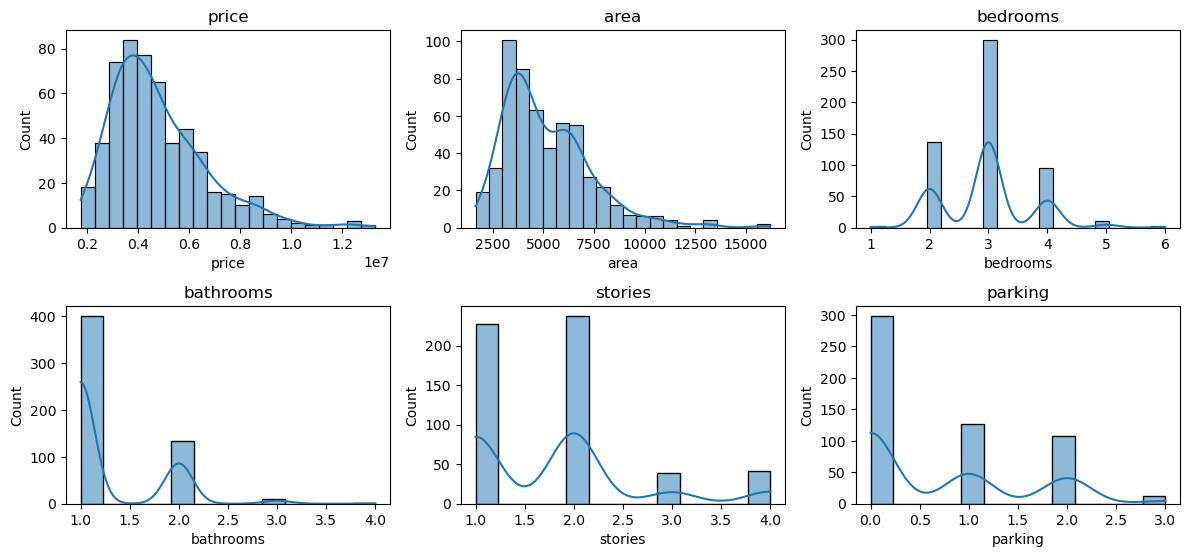

In [7]:
# Visualize distributions
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

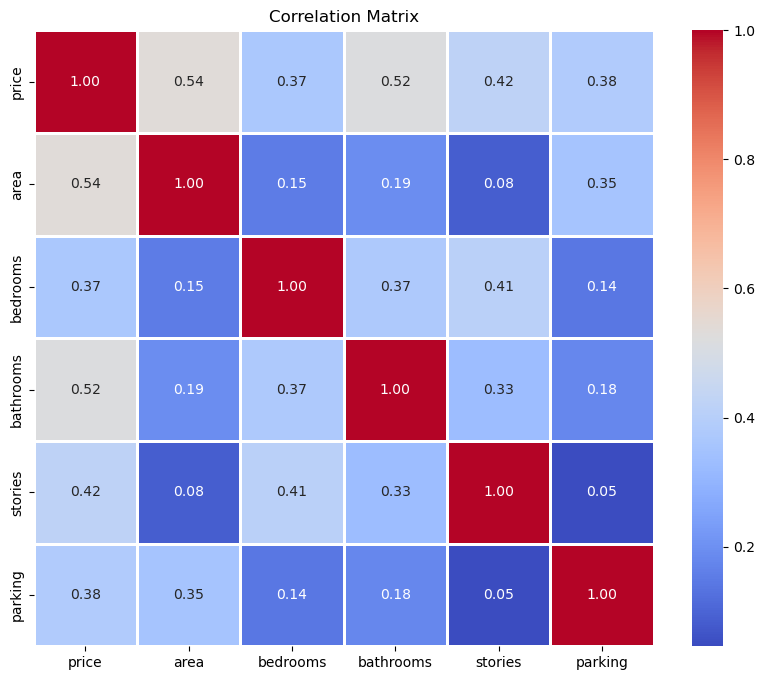

In [8]:
# Check correlations
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Matrix')
plt.show()

In [9]:
# Encode categorical variables if needed
label_encoder = LabelEncoder()
for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']:
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])

In [10]:
# Split data into training and testing sets
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking'] + [col + '_encoded' for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']]]
y = df['price']

In [23]:
best_individual

[1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
# Predict on the testing set
y_pred = model.predict(X_test)

In [35]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1771751116594.0342
R-squared: 0.6494754192267805


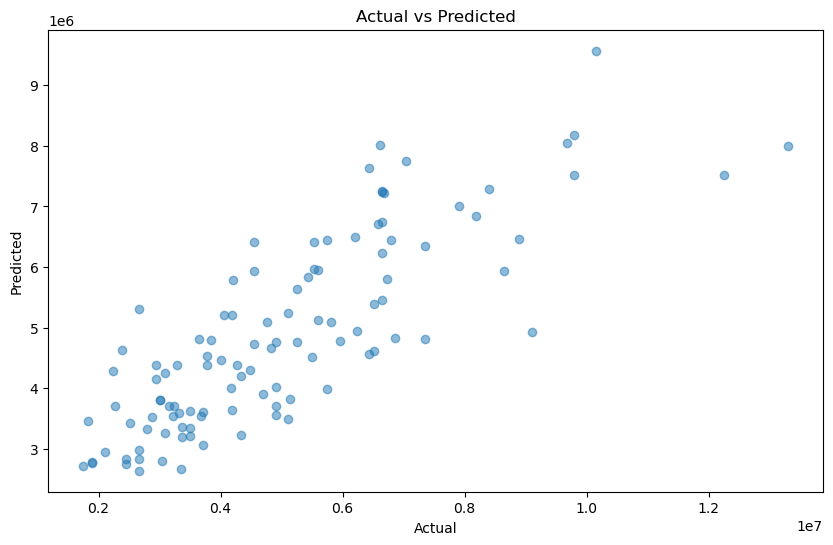

In [36]:
# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [37]:
# Calculate mean, median, mode for the target variable 'Signal Strength (dBm)'
target_col ='price'
mean_val = df[target_col].mean()
median_val = df[target_col].median()
mode_val = df[target_col].mode()[0]

In [38]:
print(f"Mean of {target_col}: {mean_val}")
print(f"Median of {target_col}: {median_val}")
print(f"Mode of {target_col}: {mode_val}")

Mean of price: 4766729.247706422
Median of price: 4340000.0
Mode of price: 3500000


In [39]:
#random forest
# Initialize the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf:.2f}, MSE: {mse_rf:.2f}, RMSE: {rmse_rf:.2f}, R²: {r2_rf:.2f}")


Random Forest - MAE: 1027863.77, MSE: 1967681433473.71, RMSE: 1402740.69, R²: 0.61


In [40]:
#SVM
from sklearn.svm import SVR

# Initialize the model
svm_model = SVR()

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
rmse_svm = mean_squared_error(y_test, y_pred_svm, squared=False)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f"SVM - MAE: {mae_svm:.2f}, MSE: {mse_svm:.2f}, RMSE: {rmse_svm:.2f}, R²: {r2_svm:.2f}")

SVM - MAE: 1763890.24, MSE: 5567932065580.12, RMSE: 2359646.60, R²: -0.10


In [41]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)


print(f"Decision Tree - MAE: {mae_dt:.2f}, MSE: {mse_dt:.2f}, RMSE: {rmse_dt:.2f}, R²: {r2_dt:.2f}")

Decision Tree - MAE: 1217422.02, MSE: 2678178165137.61, RMSE: 1636514.03, R²: 0.47


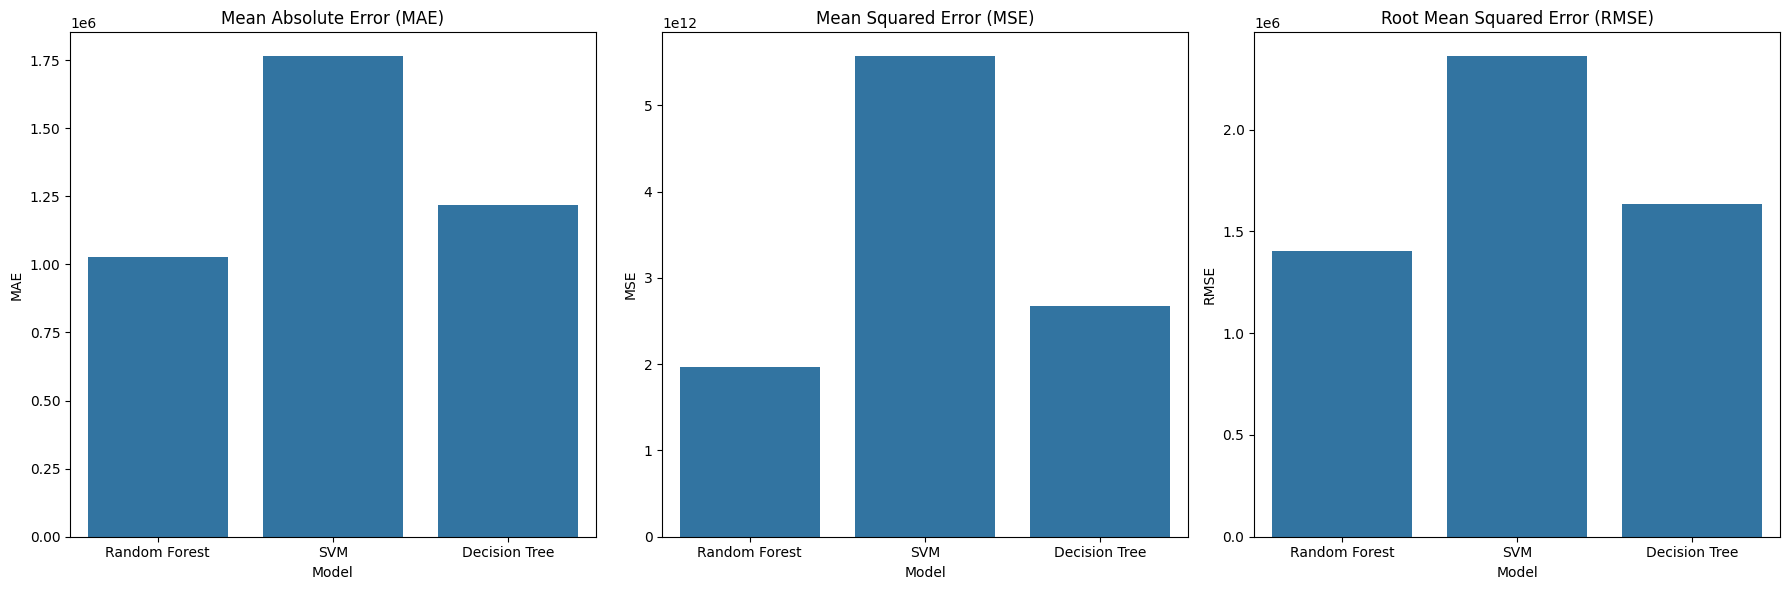

In [22]:
# Prepare the data for visualization
metrics = {
    'Model': ['Random Forest', 'SVM', 'Decision Tree'],
    'MAE': [mae_rf, mae_svm, mae_dt],
    'MSE': [mse_rf, mse_svm, mse_dt],
    'RMSE': [rmse_rf, rmse_svm, rmse_dt],
}

metrics_df = pd.DataFrame(metrics)

# Plot the metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# MAE
sns.barplot(x='Model', y='MAE', data=metrics_df, ax=axes[0])
axes[0].set_title('Mean Absolute Error (MAE)')

# MSE
sns.barplot(x='Model', y='MSE', data=metrics_df, ax=axes[1])
axes[1].set_title('Mean Squared Error (MSE)')

# RMSE
sns.barplot(x='Model', y='RMSE', data=metrics_df, ax=axes[2])
axes[2].set_title('Root Mean Squared Error (RMSE)')

plt.tight_layout()
plt.show()


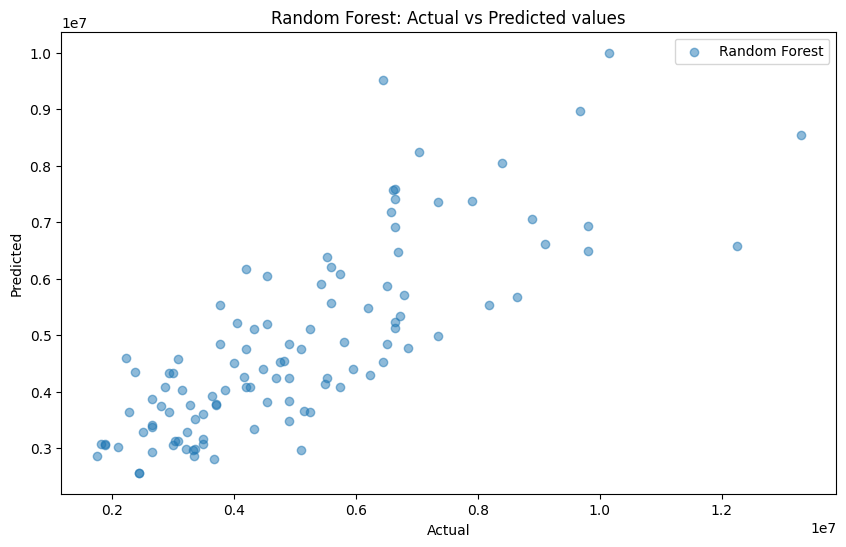

In [23]:
# RandomForest predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Actual vs Predicted values')
plt.legend()
plt.show()

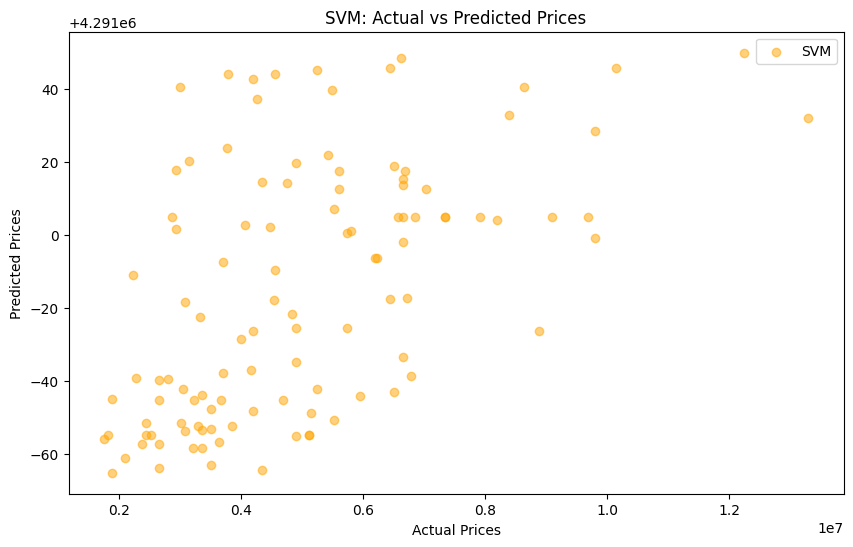

In [24]:
# SVM predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svm, alpha=0.5, label='SVM', color='orange')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('SVM: Actual vs Predicted Prices')
plt.legend()
plt.show()

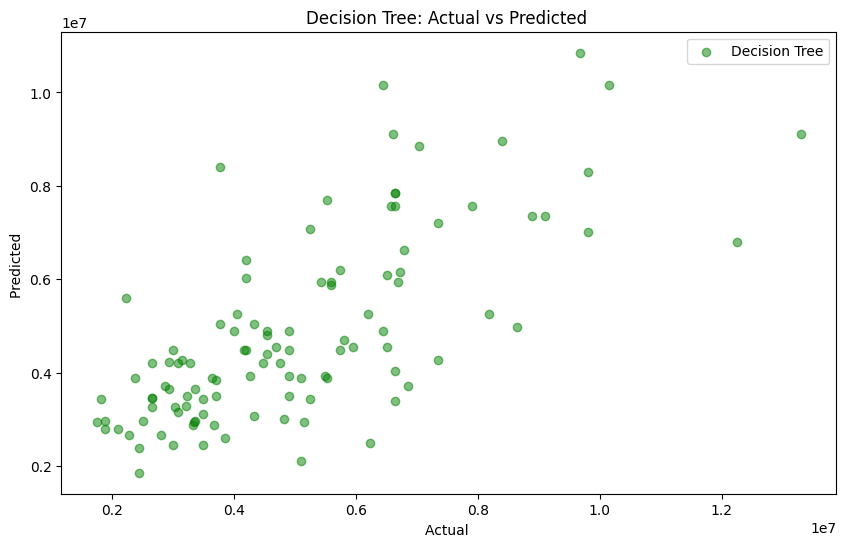

In [25]:
# Decision Tree predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.5, label='Decision Tree', color='green')
plt.xlabel('Actual ')
plt.ylabel('Predicted ')
plt.title('Decision Tree: Actual vs Predicted ')
plt.legend()
plt.show()

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  

model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))  

model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))  

model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)


Epoch 1/50
13/13 [==============================] - 9s 128ms/step - loss: 25516165824512.0000 - val_loss: 22728012726272.0000
Epoch 2/50
13/13 [==============================] - 0s 8ms/step - loss: 25516167921664.0000 - val_loss: 22728012726272.0000
Epoch 3/50
13/13 [==============================] - 0s 8ms/step - loss: 25516165824512.0000 - val_loss: 22728012726272.0000
Epoch 4/50
13/13 [==============================] - 0s 8ms/step - loss: 25516159533056.0000 - val_loss: 22728010629120.0000
Epoch 5/50
13/13 [==============================] - 0s 7ms/step - loss: 25516151144448.0000 - val_loss: 22728002240512.0000
Epoch 6/50
13/13 [==============================] - 0s 8ms/step - loss: 25516142755840.0000 - val_loss: 22727989657600.0000
Epoch 7/50
13/13 [==============================] - 0s 7ms/step - loss: 25516123881472.0000 - val_loss: 22727977074688.0000
Epoch 8/50
13/13 [==============================] - 0s 8ms/step - loss: 25516107104256.0000 - val_loss: 22727962394624.0000
Epoch 

In [51]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
# Assuming X_test and y_test are defined, and model is the trained LSTM model
y_pred_lstm = model.predict(X_test)

# Calculate LSTM metrics
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

# Print LSTM metrics
print(f'LSTM Mean Absolute Error: {mae_lstm}')
print(f'LSTM Mean Squared Error: {mse_lstm}')
print(f'LSTM Root Mean Squared Error: {rmse_lstm}')
print(f'LSTM R-squared: {r2_lstm}')


LSTM Mean Absolute Error: 979679.6912959905
LSTM Mean Squared Error: 1771751116594.0342
LSTM Root Mean Squared Error: 1331071.4167895103
LSTM R-squared: 0.6494754192267805


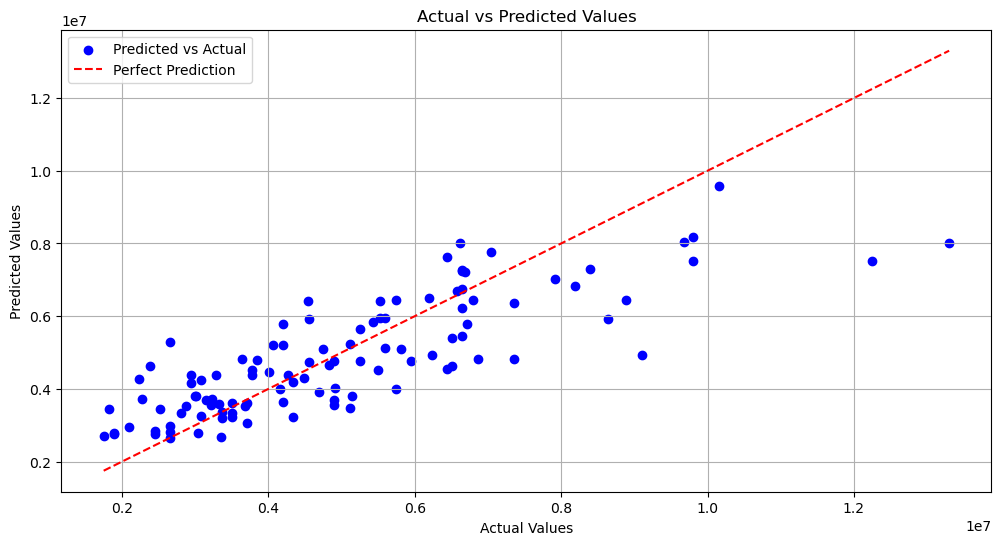

In [44]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_lstm, color='blue', label='Predicted vs Actual')

# Add a line for reference (y = x line)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


In [45]:
# Existing metrics for other models
metrics = {
    'Model': ['Random Forest', 'SVM', 'Decision Tree', 'LSTM'],
    'MAE': [mae_rf, mae_svm, mae_dt, mae_lstm],
    'MSE': [mse_rf, mse_svm, mse_dt, mse_lstm],
    'RMSE': [rmse_rf, rmse_svm, rmse_dt, rmse_lstm],
}

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics)


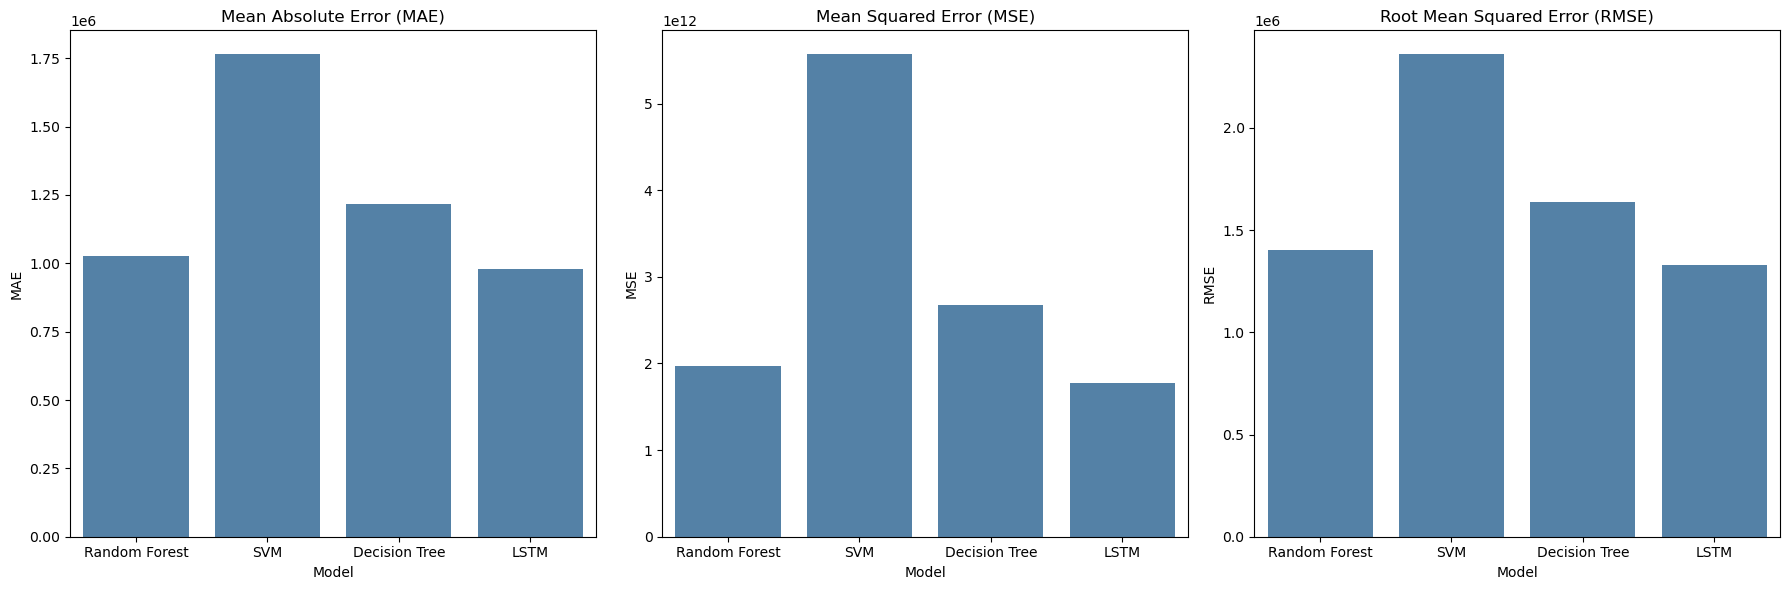

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a consistent color for the bars
bar_color = 'steelblue'

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# MAE Plot
sns.barplot(x='Model', y='MAE', data=metrics_df, ax=axes[0], color=bar_color)
axes[0].set_title('Mean Absolute Error (MAE)')

# MSE Plot
sns.barplot(x='Model', y='MSE', data=metrics_df, ax=axes[1], color=bar_color)
axes[1].set_title('Mean Squared Error (MSE)')

# RMSE Plot
sns.barplot(x='Model', y='RMSE', data=metrics_df, ax=axes[2], color=bar_color)
axes[2].set_title('Root Mean Squared Error (RMSE)')

# Adjust layout
plt.tight_layout()
plt.show()


In [20]:
from deap import base, creator, tools, algorithms
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking'] + [col + '_encoded' for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']]]
y = df['price']
def fitness_function(individual):
    selected_features = [i for i, bit in enumerate(individual) if bit]
    if len(selected_features) == 0:
        return (0,)  
    
    X_subset = X.iloc[:, selected_features]
    model = RandomForestClassifier()
    scores = cross_val_score(model, X_subset, y, cv=5)
    return (scores.mean(),)  


creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", np.random.randint, 2)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(X.columns))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", fitness_function)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)


population = toolbox.population(n=1)
ngen, cxpb, mutpb = 50, 0.5, 0.2


algorithms.eaSimple(population, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=ngen, verbose=True)

best_individual = tools.selBest(population, 1)[0]
selected_features = [i for i, bit in enumerate(best_individual) if bit]
print(f"Selected features: {selected_features}")

gen	nevals
0  	1     
1  	1     
2  	0     
3  	0     
4  	0     
5  	0     
6  	1     
7  	0     
8  	0     
9  	1     
10 	0     
11 	1     
12 	0     
13 	0     
14 	0     
15 	0     
16 	0     
17 	0     
18 	0     
19 	0     
20 	0     
21 	0     
22 	0     
23 	1     
24 	0     
25 	0     
26 	0     
27 	0     
28 	0     
29 	0     
30 	0     
31 	0     
32 	1     
33 	0     
34 	0     
35 	1     
36 	0     
37 	0     
38 	0     
39 	0     
40 	0     
41 	0     
42 	1     
43 	0     
44 	0     
45 	0     
46 	0     
47 	0     
48 	1     
49 	0     
50 	0     
Selected features: [0, 1, 4, 5, 7, 9]


In [26]:
print(X_test.shape)

(109, 12)


In [27]:
X_test.iloc[0]

area                        5900
bedrooms                       4
bathrooms                      2
stories                        2
parking                        1
mainroad_encoded               0
guestroom_encoded              0
basement_encoded               1
hotwaterheating_encoded        0
airconditioning_encoded        0
prefarea_encoded               0
furnishingstatus_encoded       2
Name: 316, dtype: int64

In [28]:
y_test.iloc[0]

4060000

In [48]:
# Select a single value from X_test
index = 0  # You can change this to any valid index within the range of X_test
single_test_value = X_test.iloc[index]

# Reshape the data to match the expected input format for the models (1 sample, n_features)
single_test_value_reshaped = single_test_value.values.reshape(1, -1)

# RandomForest prediction
rf_single_prediction = rf_model.predict(single_test_value_reshaped)[0]

# SVM prediction
svm_single_prediction = svm_model.predict(single_test_value_reshaped)[0]

# Decision Tree prediction
dt_single_prediction = dt_model.predict(single_test_value_reshaped)[0]

# Print the predictions
print(f"Random Forest prediction: {rf_single_prediction}")
print(f"SVM prediction: {svm_single_prediction}")
print(f"Decision Tree prediction: {dt_single_prediction}")

# Optionally, print the actual value for comparison
actual_value = y_test.iloc[index]
print(f"Actual value: {actual_value}")

Random Forest prediction: 5207475.0
SVM prediction: 4291002.655026083
Decision Tree prediction: 5250000.0
Actual value: 4060000


In [49]:
import pandas as np

# Create a dictionary with the new values for each parameter
new_test_values = {
    'area': 5900,
    'bedrooms': 5,
    'bathrooms': 3,
    'stories': 3,
    'parking': 2,
    'mainroad_encoded': 1,
    'guestroom_encoded': 1,
    'basement_encoded': 1,
    'hotwaterheating_encoded': 1,
    'airconditioning_encoded': 1,
    'prefarea_encoded': 1,
    'furnishingstatus_encoded': 1
}

# Convert the dictionary to a DataFrame
new_test_df = pd.DataFrame([new_test_values])

# Ensure the new test instance has the same structure as X_test
print("New Test Instance DataFrame:")
print(new_test_df)

# Predict the price using the new test instance with each model
new_test_array = new_test_df.to_numpy().reshape(1, -1)

# RandomForestRegressor prediction
y_pred_rf_new = rf_model.predict(new_test_array)
print(f"RandomForestRegressor predicted price: {y_pred_rf_new[0]}")

# SVM prediction
y_pred_svm_new = svm_model.predict(new_test_array)
print(f"SVM predicted price: {y_pred_svm_new[0]}")

# DecisionTreeRegressor prediction
y_pred_dt_new = dt_model.predict(new_test_array)
print(f"DecisionTreeRegressor predicted price: {y_pred_dt_new[0]}")


New Test Instance DataFrame:
   area  bedrooms  bathrooms  stories  parking  mainroad_encoded  \
0  5900         5          3        3        2                 1   

   guestroom_encoded  basement_encoded  hotwaterheating_encoded  \
0                  1                 1                        1   

   airconditioning_encoded  prefarea_encoded  furnishingstatus_encoded  
0                        1                 1                         1  
RandomForestRegressor predicted price: 7609735.0
SVM predicted price: 4291002.655065062
DecisionTreeRegressor predicted price: 8400000.0


In [31]:
#save random forest
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(model, file)
    
# Save SVM model
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)

# Save Decision Tree model
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(dt_model, file)

print("Models have been saved successfully.")

Models have been saved successfully.
